In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nba_api.stats.endpoints import leaguedashteamstats
import numpy as np

In [36]:
shot_data = pd.read_csv('Data/NBA_2004_2023_Shots.csv')
game_data = pd.read_csv('Data/games.csv')

In [37]:
game_data = game_data.drop_duplicates(subset='GAME_ID', keep='first')

In [38]:
game_data['SCORE_DIFF'] = abs(game_data['PTS_home'] - game_data['PTS_away'])

In [39]:
shot_df = shot_data.merge(game_data[['GAME_ID','SCORE_DIFF','HOME_TEAM_ID']], how='left', on='GAME_ID')

In [40]:
shot_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SCORE_DIFF,HOME_TEAM_ID
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,L,24+ ft.,23.4,12.95,24,1,11,20,7.0,1.610613e+09
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,C,24+ ft.,-0.4,31.45,26,1,10,52,7.0,1.610613e+09
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39,7.0,1.610613e+09
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31,7.0,1.610613e+09
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,C,Less Than 8 ft.,1.8,7.15,2,1,10,5,7.0,1.610613e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012556,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,L,24+ ft.,23.3,9.55,23,1,11,21,15.0,1.610613e+09
4012557,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,LC,24+ ft.,15.1,25.85,25,1,11,24,1.0,1.610613e+09
4012558,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,C,Less Than 8 ft.,-4.7,9.85,6,1,11,39,16.0,1.610613e+09
4012559,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,C,Less Than 8 ft.,-2.3,6.05,2,1,11,42,1.0,1.610613e+09


In [41]:
scoreless_games = shot_df[shot_df["SCORE_DIFF"].isna()]["GAME_ID"].unique()
missing_games = game_data[game_data['GAME_ID'].isin(scoreless_games)]
unmatched_games = shot_data[shot_data['GAME_ID'].isin(scoreless_games)]

In [42]:
# shot_df = shot_df[~shot_df['GAME_ID'].isin(scoreless_games)]

In [43]:
positionless_players = shot_df[shot_df["POSITION"].isna()]["PLAYER_NAME"].unique()
positionless_players

array(['O.G. Anunoby', 'Jeff Dowtin Jr.', 'John Butler Jr.',
       'Chance Comanche', 'AJ Green', 'Xavier Tillman',
       'Xavier Tillman Sr.', 'OG Anunoby', 'Jeff Dowtin',
       'Charlie Brown Jr.', 'M.J. Walker', 'Trevon Scott', 'P.J. Dozier',
       'Cam Reynolds', 'T.J. Leaf', 'Michael Frazier II',
       'Jeffery Taylor', 'Vitor Faverani'], dtype=object)

In [44]:
shot_df.loc[shot_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION'] = 'SF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'OG Anunoby', 'POSITION'] = 'SF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'OG Anunoby', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION'] = 'PG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION'] = 'PG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION'] = 'PF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Chance Comanche', 'POSITION_GROUP'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'AJ Green', 'POSITION'] = 'SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'AJ Green', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION_GROUP'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION_GROUP'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION'] = 'SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'M.J. Walker', 'POSITION'] = 'SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'M.J. Walker', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Trevon Scott', 'POSITION'] = 'SF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Trevon Scott', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION'] = 'SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION'] = 'SF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION'] = 'PF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION'] = 'SG'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION_GROUP'] = 'G'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION'] = 'SF'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION_GROUP'] = 'F'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION'] = 'C'
shot_df.loc[shot_df['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION_GROUP'] = 'C'

In [11]:
shot_df["TEAM_ID"].astype("object")
shot_df["PLAYER_ID"].astype("object")
shot_df["GAME_ID"].astype("object")
# shot_df["SEASON_1"] = pd.to_datetime(shot_df["SEASON_1"], format="%Y")
shot_df["GAME_DATE"] = pd.to_datetime(shot_df["GAME_DATE"])
shot_df.dtypes

/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_34597/3088657207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_df["GAME_DATE"] = pd.to_datetime(shot_df["GAME_DATE"])


SEASON_1                   int64
SEASON_2                  object
TEAM_ID                    int64
TEAM_NAME                 object
PLAYER_ID                  int64
PLAYER_NAME               object
POSITION_GROUP            object
POSITION                  object
GAME_DATE         datetime64[ns]
GAME_ID                    int64
HOME_TEAM                 object
AWAY_TEAM                 object
EVENT_TYPE                object
SHOT_MADE                   bool
ACTION_TYPE               object
SHOT_TYPE                 object
BASIC_ZONE                object
ZONE_NAME                 object
ZONE_ABB                  object
ZONE_RANGE                object
LOC_X                    float64
LOC_Y                    float64
SHOT_DISTANCE              int64
QUARTER                    int64
MINS_LEFT                  int64
SECS_LEFT                  int64
SCORE_DIFF               float64
HOME_TEAM_ID             float64
dtype: object

In [12]:
shot_df["TIME_LEFT_QUARTER"] = shot_df["MINS_LEFT"] * 60 + shot_df["SECS_LEFT"]
shot_df["TIME_LEFT_GAME"] = (4 - shot_df["QUARTER"]) * 15 * 60 + shot_df["TIME_LEFT_QUARTER"]
shot_df["TIME_LEFT_GAME"] = np.where(shot_df["TIME_LEFT_GAME"]<0, shot_df["MINS_LEFT"] * 60 + shot_df["SECS_LEFT"], shot_df['TIME_LEFT_GAME'])

/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_34597/1674431263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_df["TIME_LEFT_QUARTER"] = shot_df["MINS_LEFT"] * 60 + shot_df["SECS_LEFT"]
/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_34597/1674431263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_df["TIME_LEFT_GAME"] = (4 - shot_df["QUARTER"]) * 15 * 60 + shot_df["TIME_LEFT_QUARTER"]
/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_34597/1674431263.py:3: 

(0.4, 0.5)

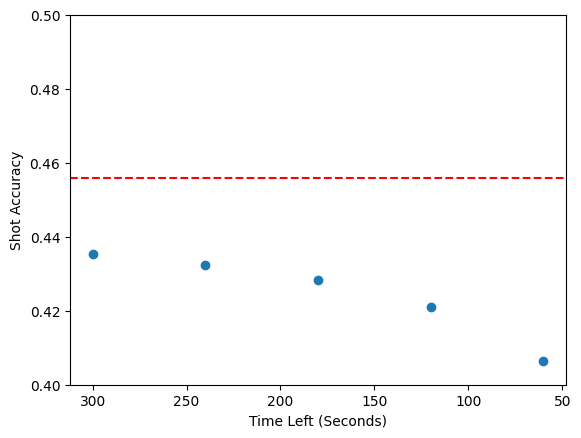

In [13]:
count_true = shot_df['SHOT_MADE'].sum()
count = len(shot_df)
total_accuracy = count_true/count

Clutch_time_threshold = [60,120,180,240,300]
accuracy = []

for i in Clutch_time_threshold:
    under = shot_df[shot_df['TIME_LEFT_GAME']<i]
    count_true_under = under['SHOT_MADE'].sum()
    count_under = len(under)
    accuracy.append(count_true_under/count_under)
    
plt.scatter(Clutch_time_threshold, accuracy, label='Clutch Threshold Plot')
plt.axhline(y=total_accuracy, color='r', linestyle='--', label='Total Shot Accuracy')
plt.xlabel('Time Left (Seconds)')
plt.ylabel('Shot Accuracy')
plt.gca().invert_xaxis()
plt.ylim(0.4, 0.5)

In [14]:
shot_df["SHOT_VALUE"] = shot_df["SHOT_MADE"].astype(int) * shot_df["SHOT_TYPE"].str[:1].astype(int)

/var/folders/5d/x77440zn3c332t6t3c7wdsnm0000gn/T/ipykernel_34597/594648786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_df["SHOT_VALUE"] = shot_df["SHOT_MADE"].astype(int) * shot_df["SHOT_TYPE"].str[:1].astype(int)


In [15]:
def extract_shot(input_strings):
    # Define the regex pattern to capture the last two words
    pattern = re.compile(r'\b(\w+ shot)\b')

    result_list = []

    for input_string in input_strings:
        # Search for the pattern in the input string
        # print(input_string)
        match = pattern.search(input_string.lower())

        if match:
        # Extract the captured group (last two words)
            last_two_words = match.group(1)

            # Check if the last three words are "Finger Roll Shot"
            if len(input_string.lower().split()) >= 3 and input_string.lower().split()[-3:] == ["finger", "roll", "shot"]:
                result_list.append("finger roll shot")
            else:
                # Extract the last two words
                result_list.append(last_two_words)

        else: result_list.append("DNE")

    return result_list

shot_df = shot_df.assign(ACTION_GROUP = extract_shot(shot_df["ACTION_TYPE"]))

In [16]:
shot_df = shot_df[shot_df["ACTION_GROUP"] != "no shot"]

In [17]:
seasons = ['2003-04', '2004-05','2005-06', '2006-07','2007-08', '2008-09','2009-10', '2010-11','2011-12', '2012-13','2013-14', '2014-15','2015-16', '2016-17','2017-18', '2018-19','2019-20', '2020-21','2021-22', '2022-23']
season_type = 'Regular Season'

list_stats = []
# Get advanced team statistics
for season in seasons:
    team_stats = leaguedashteamstats.LeagueDashTeamStats(
    season=season,
    season_type_all_star=season_type,
    measure_type_detailed_defense='Advanced',
    ).get_data_frames()[0]
    team_stats['SEASON_2'] = season
    list_stats.append(team_stats)
    
#concatenate the list together to a full dataframe
advanced_stats = pd.concat(list_stats, ignore_index=True)


Abbrev = pd.read_csv('Data/NBAAbbrev.csv') #Add home full team name
shot_df = pd.merge(shot_df, Abbrev[['Abbreviation','Team Name']], left_on=['HOME_TEAM'], right_on=['Abbreviation'], how='left')
del shot_df['Abbreviation']

shot_df = shot_df.rename(columns={'Team Name': 'HOME_FULL'})

#Add away full team name
shot_df = pd.merge(shot_df, Abbrev[['Abbreviation','Team Name']], left_on=['AWAY_TEAM'], right_on=['Abbreviation'], how='left')
del shot_df['Abbreviation']

shot_df = shot_df.rename(columns={'Team Name': 'AWAY_FULL'})


advanced_stats['TEAM_NAME'] = np.where(advanced_stats['TEAM_NAME']=='LA Clippers', 'Los Angeles Clippers', advanced_stats['TEAM_NAME'])

shot_df['OPPONENT'] = np.where(shot_df['TEAM_NAME']==shot_df['HOME_FULL'], shot_df['AWAY_FULL'], shot_df['HOME_FULL'])


shot_df = pd.merge(shot_df, advanced_stats[['SEASON_2', 'TEAM_NAME', 'E_DEF_RATING','DEF_RATING']], left_on=['SEASON_2', 'OPPONENT'], right_on=['SEASON_2','TEAM_NAME'],how='left')
del shot_df['TEAM_NAME_y']

In [18]:
shot_df['CLUTCH'] = np.where(shot_df['TIME_LEFT_GAME']<=120, True, False)
shot_df['BUZZER'] = np.where(shot_df['TIME_LEFT_QUARTER']<=5, True, False)

In [19]:
shot_df.loc[shot_df['QUARTER'] == 6, 'QUARTER'] = 5
shot_df.loc[shot_df['QUARTER'] == 7, 'QUARTER'] = 5
shot_df.loc[shot_df['QUARTER'] == 8, 'QUARTER'] = 5

In [20]:
shot_df["HOME"] = shot_df["TEAM_NAME_x"] == shot_df["HOME_FULL"]

In [23]:
shot_df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME_x,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,HOME_FULL,AWAY_FULL,OPPONENT,E_DEF_RATING,DEF_RATING,CLUTCH,BUZZER,HOME,PLOT_X,PLOT_Y
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,2022-10-19,22200004,...,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1,False,False,False,234.0,79.5
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,...,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1,False,False,False,-4.0,264.5
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,...,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1,False,False,False,-13.0,2.5
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,...,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1,False,False,False,-1.0,22.5
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2022-10-19,22200004,...,Indiana Pacers,Washington Wizards,Indiana Pacers,115.4,117.1,False,False,False,18.0,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878343,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,2003-10-28,20300001,...,Philadelphia 76ers,Miami Heat,Miami Heat,98.9,100.3,False,False,True,233.0,45.5
3878344,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,2003-10-28,20300002,...,San Antonio Spurs,Phoenix Suns,Phoenix Suns,102.2,104.2,False,False,True,151.0,208.5
3878345,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,2003-10-28,20300003,...,Los Angeles Lakers,Dallas Mavericks,Dallas Mavericks,104.3,105.9,False,False,True,-47.0,48.5
3878346,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,2003-10-28,20300002,...,San Antonio Spurs,Phoenix Suns,San Antonio Spurs,91.6,93.1,False,False,False,-23.0,10.5
